In [1]:
using CairoMakie
using Statistics

In [2]:
include("io_array.jl")

read_from_csv (generic function with 1 method)

In [3]:
function load_average(filename, num_seeds)
    avg = nothing
    for seed in 1:num_seeds
        data = read_from_file(filename * "_seed=$(seed).txt")
        if avg === nothing
            avg = copy(data)
        else
            avg .+= data
        end
    end

    avg ./= num_seeds

    return avg
end

load_average (generic function with 1 method)

In [4]:
# --- Load and average data (NARMA) ---

input_std_grid = read_from_file("data//narma_r2_noise_scaling//1_input_std_grid.txt")[:, 1]

noise_std_list = ["1e-10", "1e-9", "1e-8", "1e-7", "1e-6"]
r2_av_list = []

for noise_std in noise_std_list
    filename = "data//narma_r2_noise_scaling//r2_N=600_noise=$(noise_std)"
    r2_av = load_average(filename, 20)[:, 1]
    push!(r2_av_list, r2_av)
end
r2_av_list[1]

81-element Vector{Float64}:
 0.597694858904226
 0.5976802985748138
 0.5976723008331102
 0.5976851292729326
 0.5977483542117297
 0.5979212451742963
 0.5983193042906706
 0.599162255527433
 0.6008587875988826
 0.60414806800743
 ⋮
 0.9765851498520648
 0.9693748281570113
 0.9593368439542376
 0.9452514446629422
 0.9257012068165087
 0.8991786902521426
 0.8639970476734572
 0.8176122299258111
 0.758443659719631

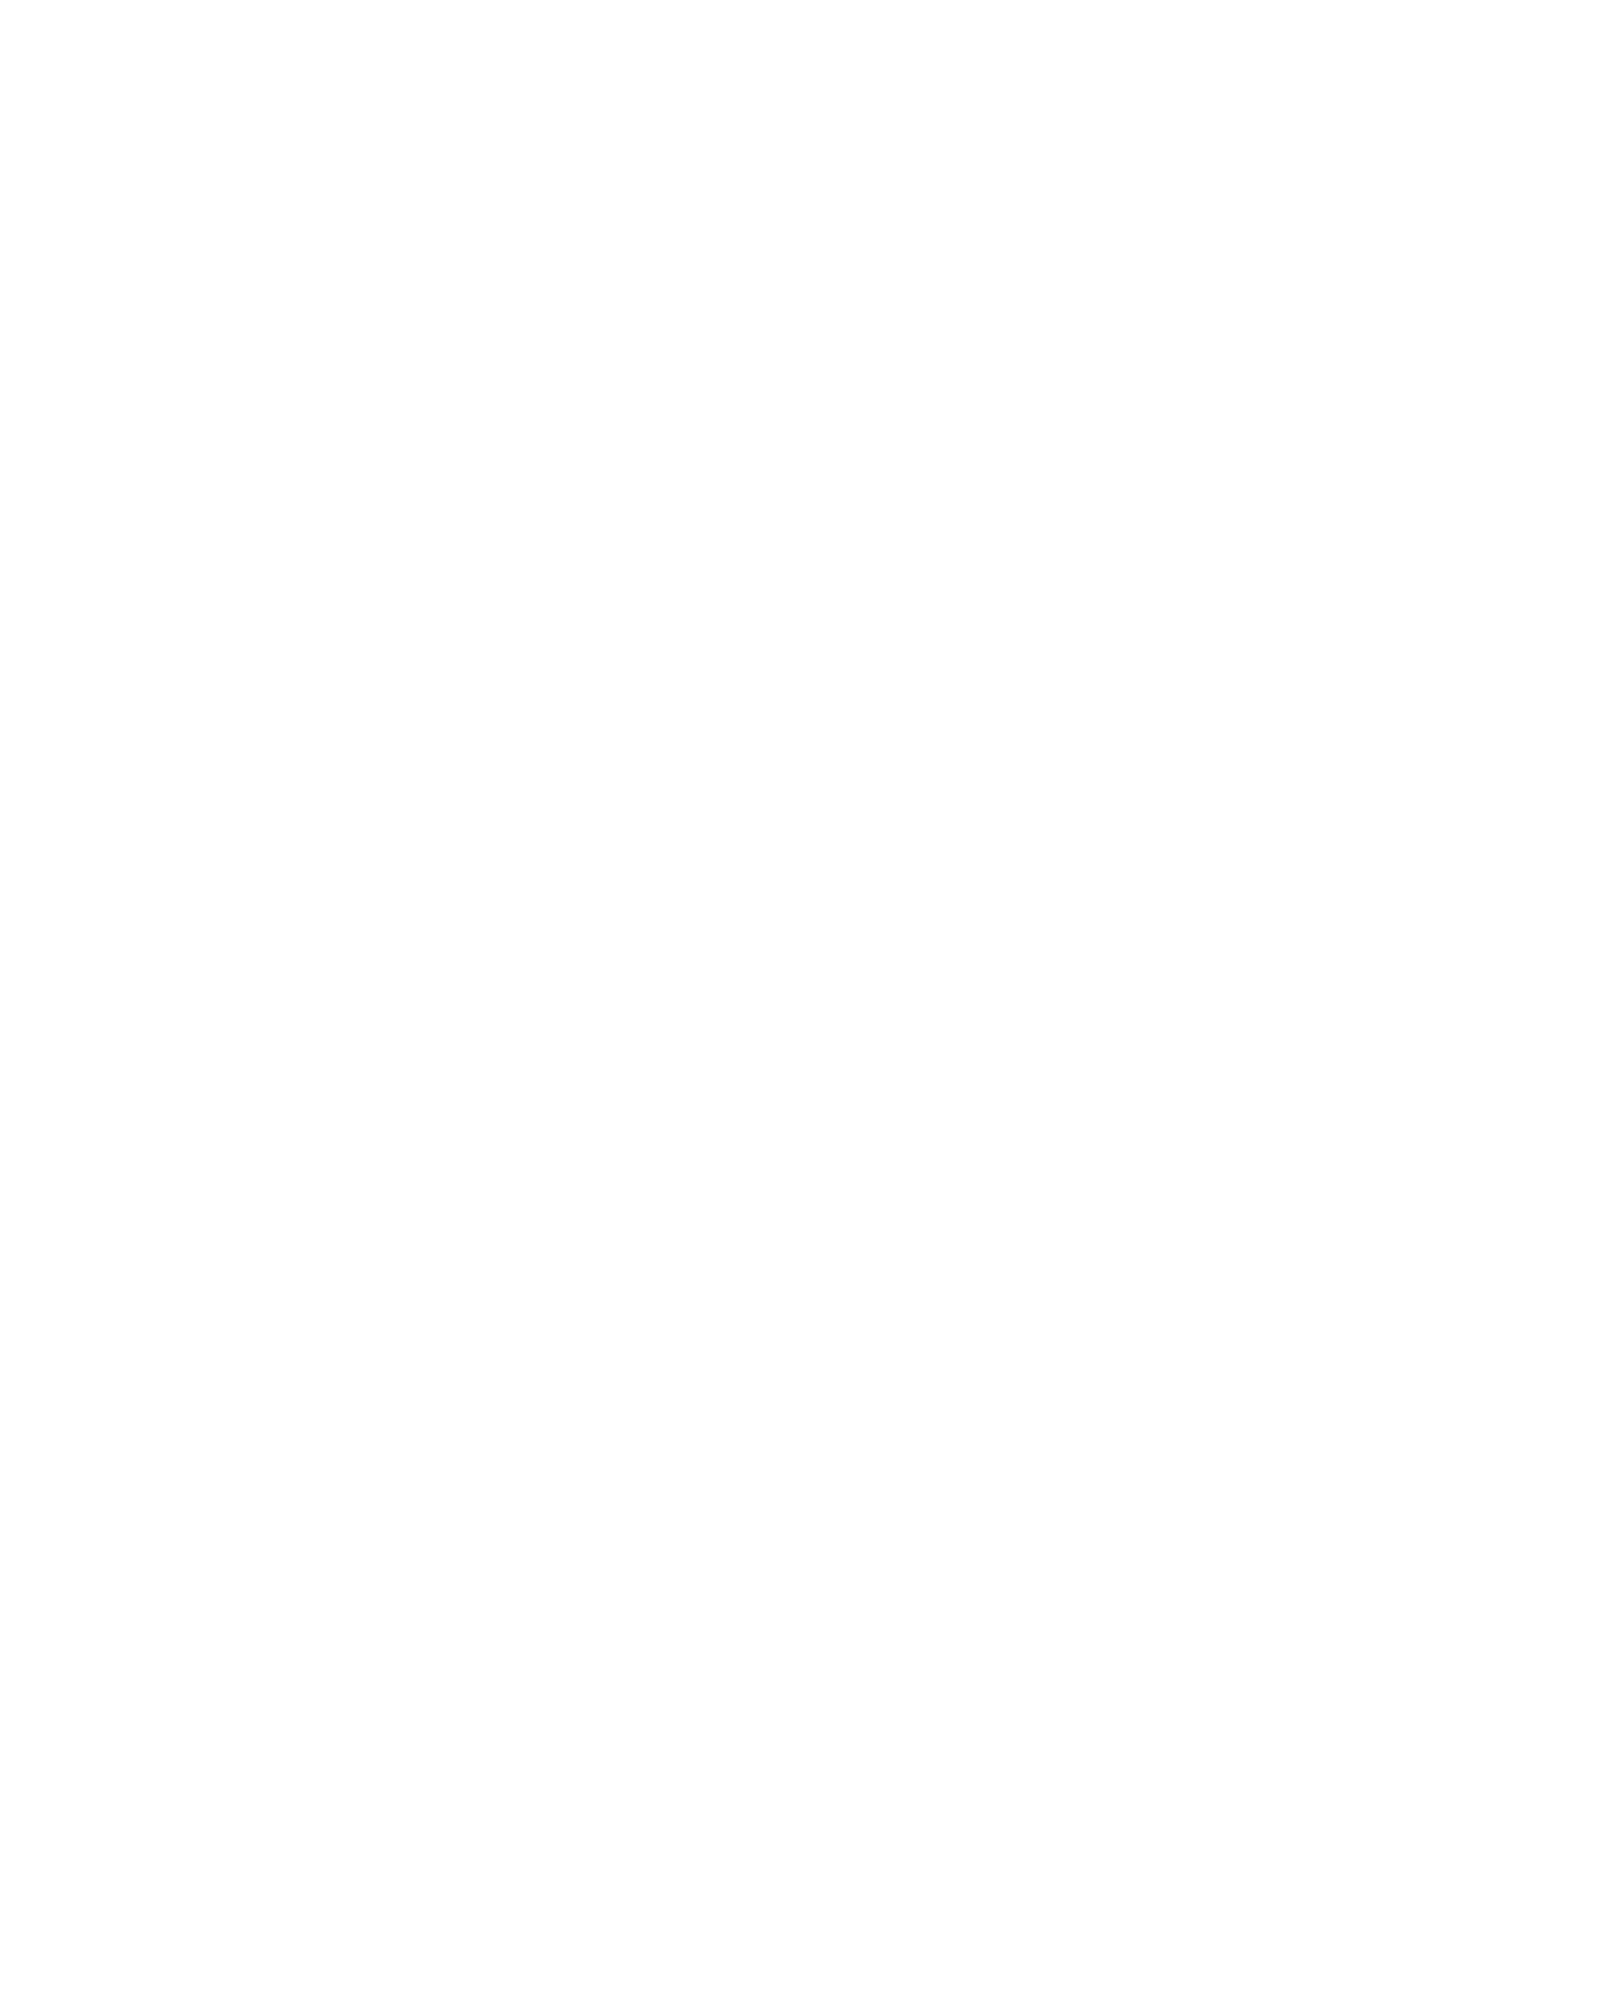

In [5]:
set_theme!(
    fontsize=25,
    Legend=(labelsize=20,),
    Axis=(
        xgridvisible=false,
        ygridvisible=false,
    ),
)

fig = Figure(size=(800, 1000))

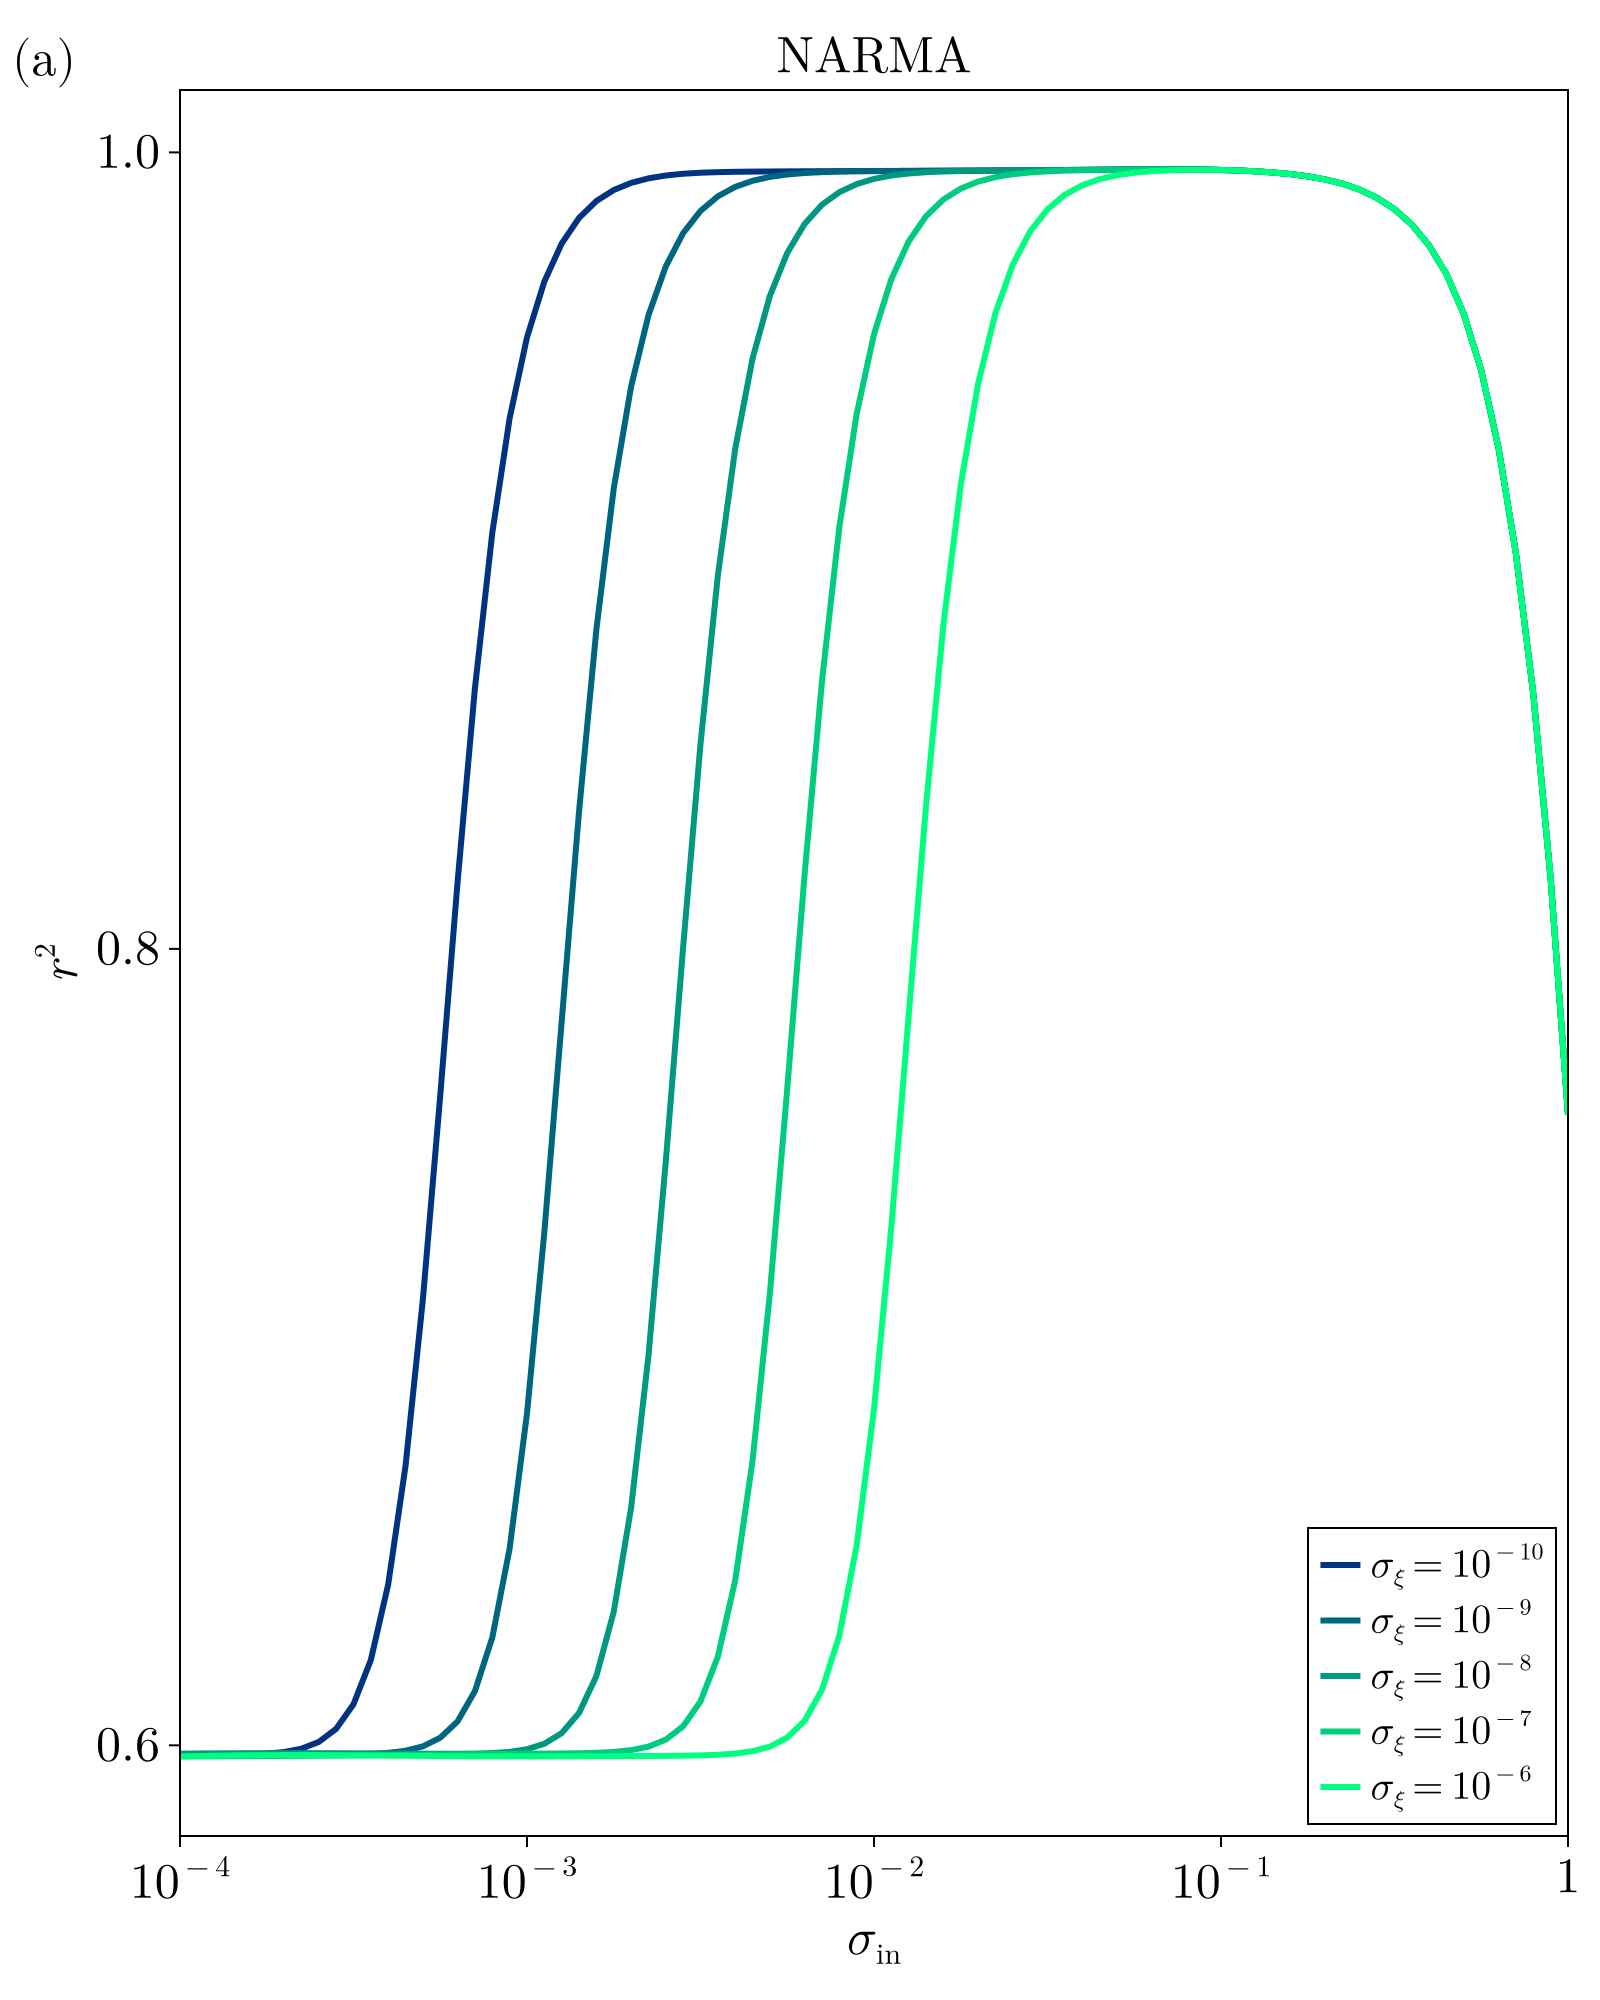

In [6]:
ax = Axis(fig[1, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-4, 1e-3, 1e-2, 1e-1, 1], [L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{NARMA}")

xlims!(ax, 1e-4, 1)

lines!(ax, input_std_grid, r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid, r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid, r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid, r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid, r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[1, 1, TopLeft()], L"\mathrm{(a)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

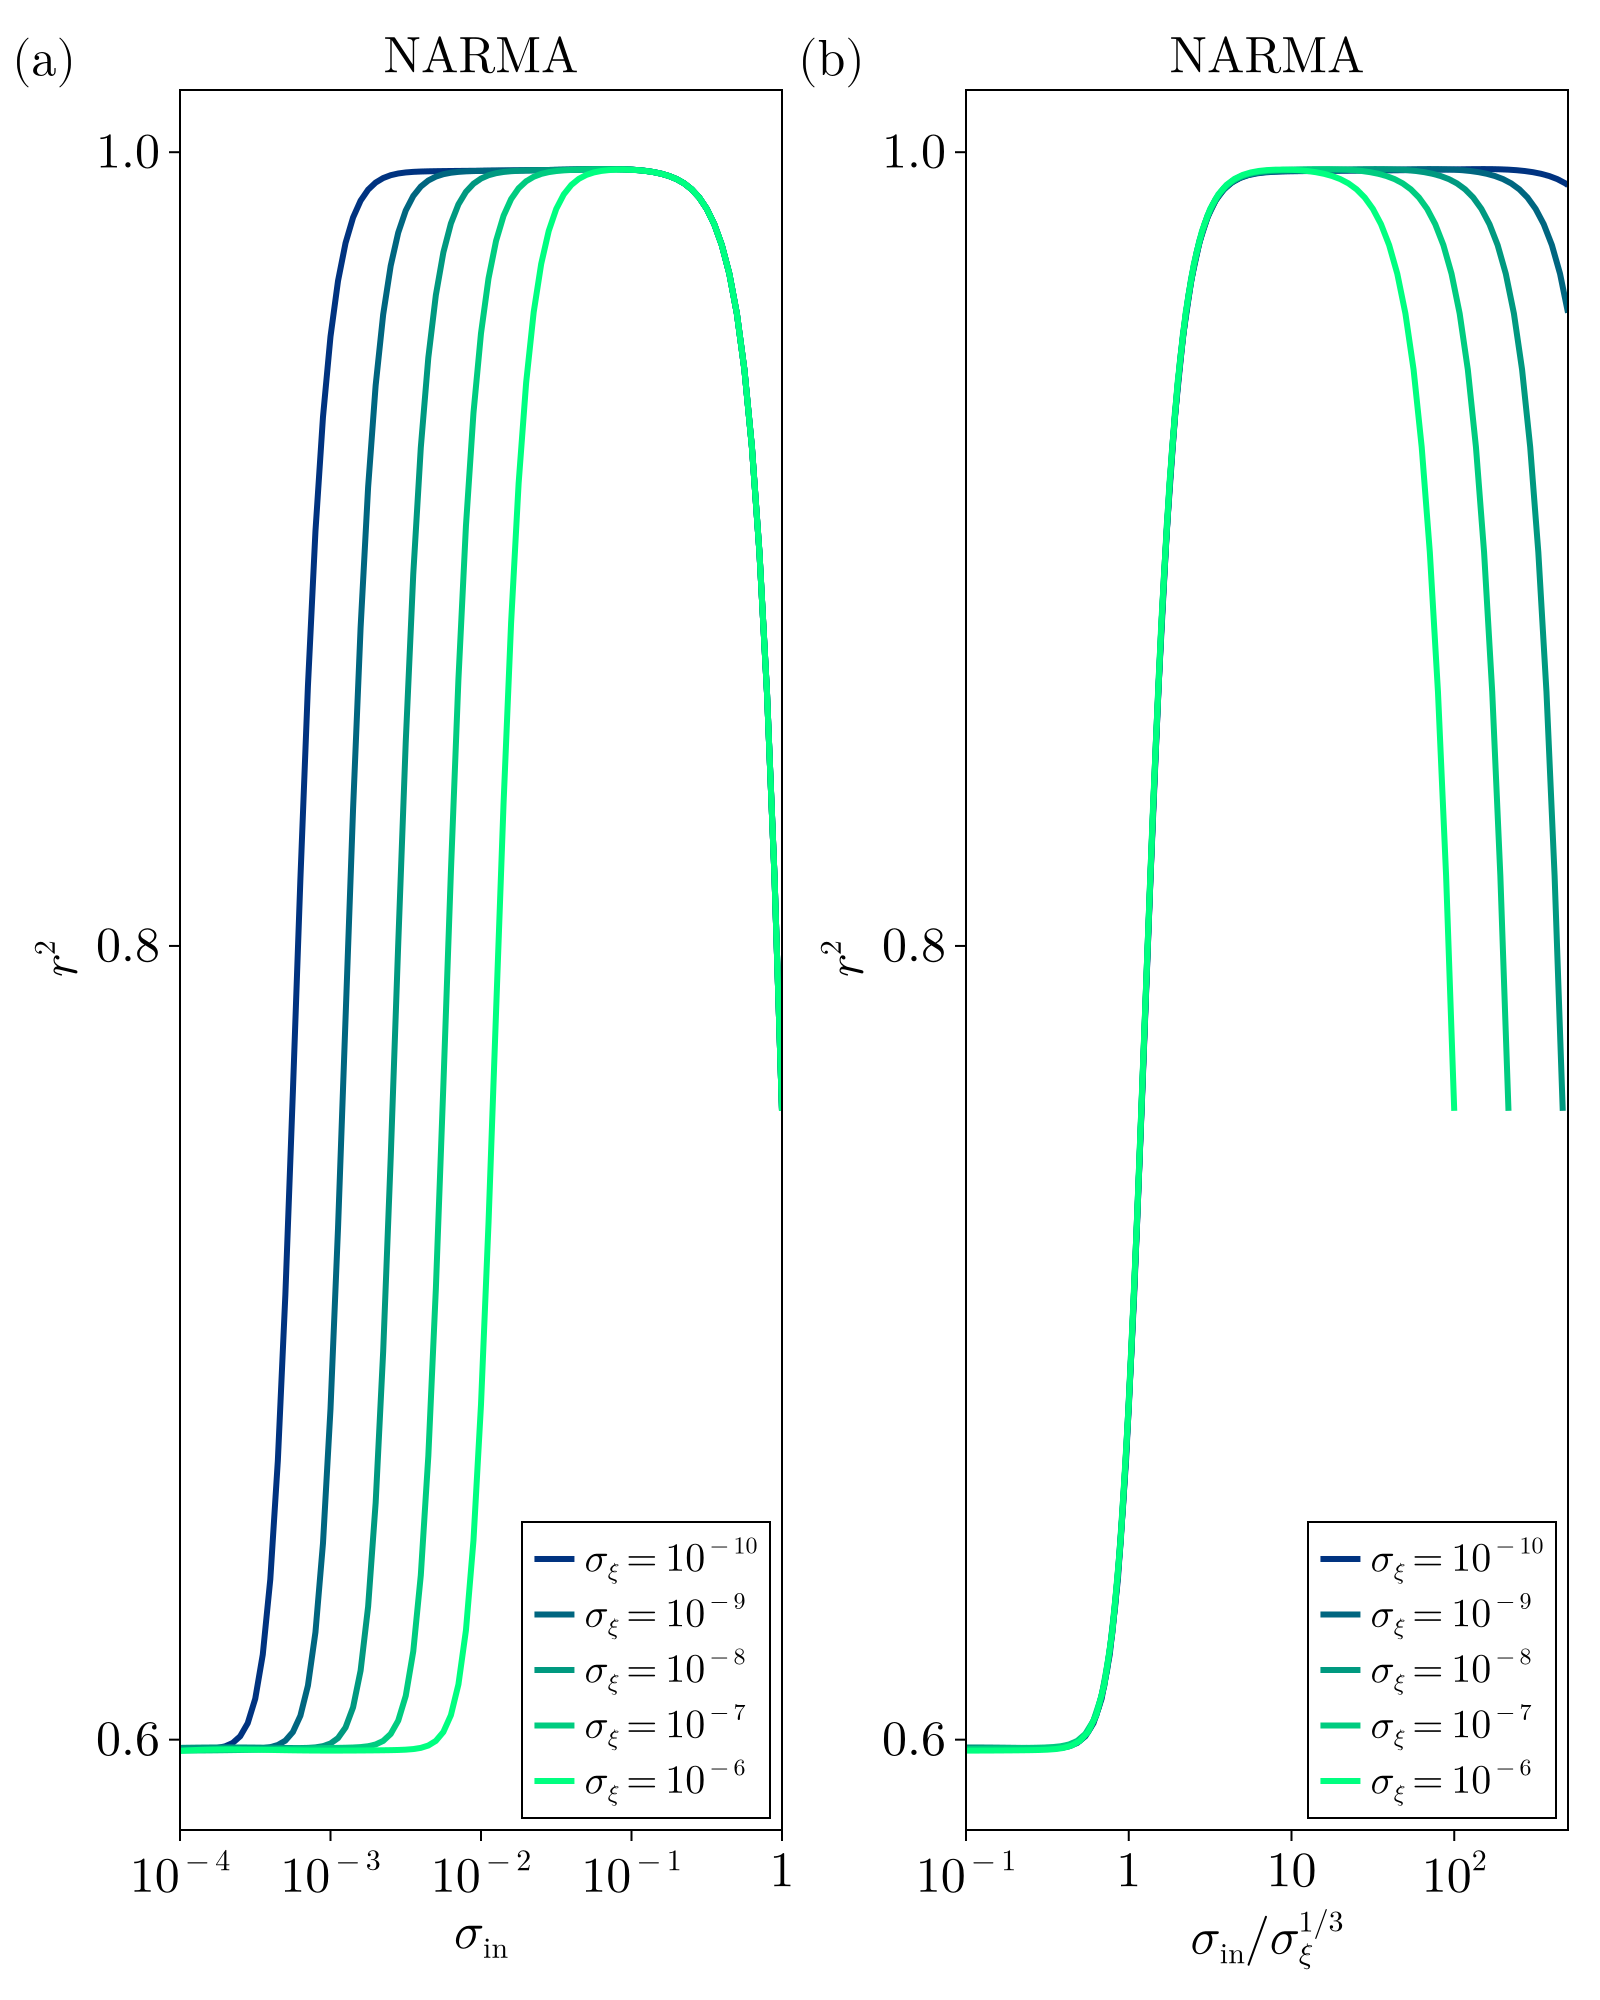

In [7]:
ax = Axis(fig[1, 2];
    xlabel=L"\sigma_{\mathrm{in}} / \sigma_{\xi}^{1/3}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-1, 1, 1e1, 1e2], [L"10^{-1}", L"1", L"10", L"10^2"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{NARMA}")

xlims!(ax, 1e-1, 5e2)

lines!(ax, input_std_grid * (1e-10 ^ (-1/3)), r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid * (1e-9 ^ (-1/3)), r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid * (1e-8 ^ (-1/3)), r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid * (1e-7 ^ (-1/3)), r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid * (1e-6 ^ (-1/3)), r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[1, 2, TopLeft()], L"\mathrm{(b)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

In [8]:
# --- Load and average data (Lorenz) ---

input_std_grid = read_from_file("data//lorenz_r2_noise_scaling//1_input_std_grid.txt")[:, 1]

noise_std_list = ["1e-10", "1e-9", "1e-8", "1e-7", "1e-6"]
r2_av_list = []

for noise_std in noise_std_list
    filename = "data//lorenz_r2_noise_scaling//r2_N=600_noise=$(noise_std)"
    r2_av = load_average(filename, 20)[:, 1]
    push!(r2_av_list, r2_av)
end
r2_av_list[1]

81-element Vector{Float64}:
 0.28249259897452783
 0.28793697637743876
 0.2985523337415117
 0.3185093388763394
 0.35373530708862194
 0.40978877597321384
 0.4864633951004357
 0.5736005223705618
 0.655836691784089
 0.7224192106917325
 ⋮
 0.9828755192823266
 0.986379874260501
 0.9893537261371239
 0.9916547578476615
 0.9934214297755887
 0.9946242235720744
 0.9952309074421812
 0.9958299138793538
 0.996385011353585

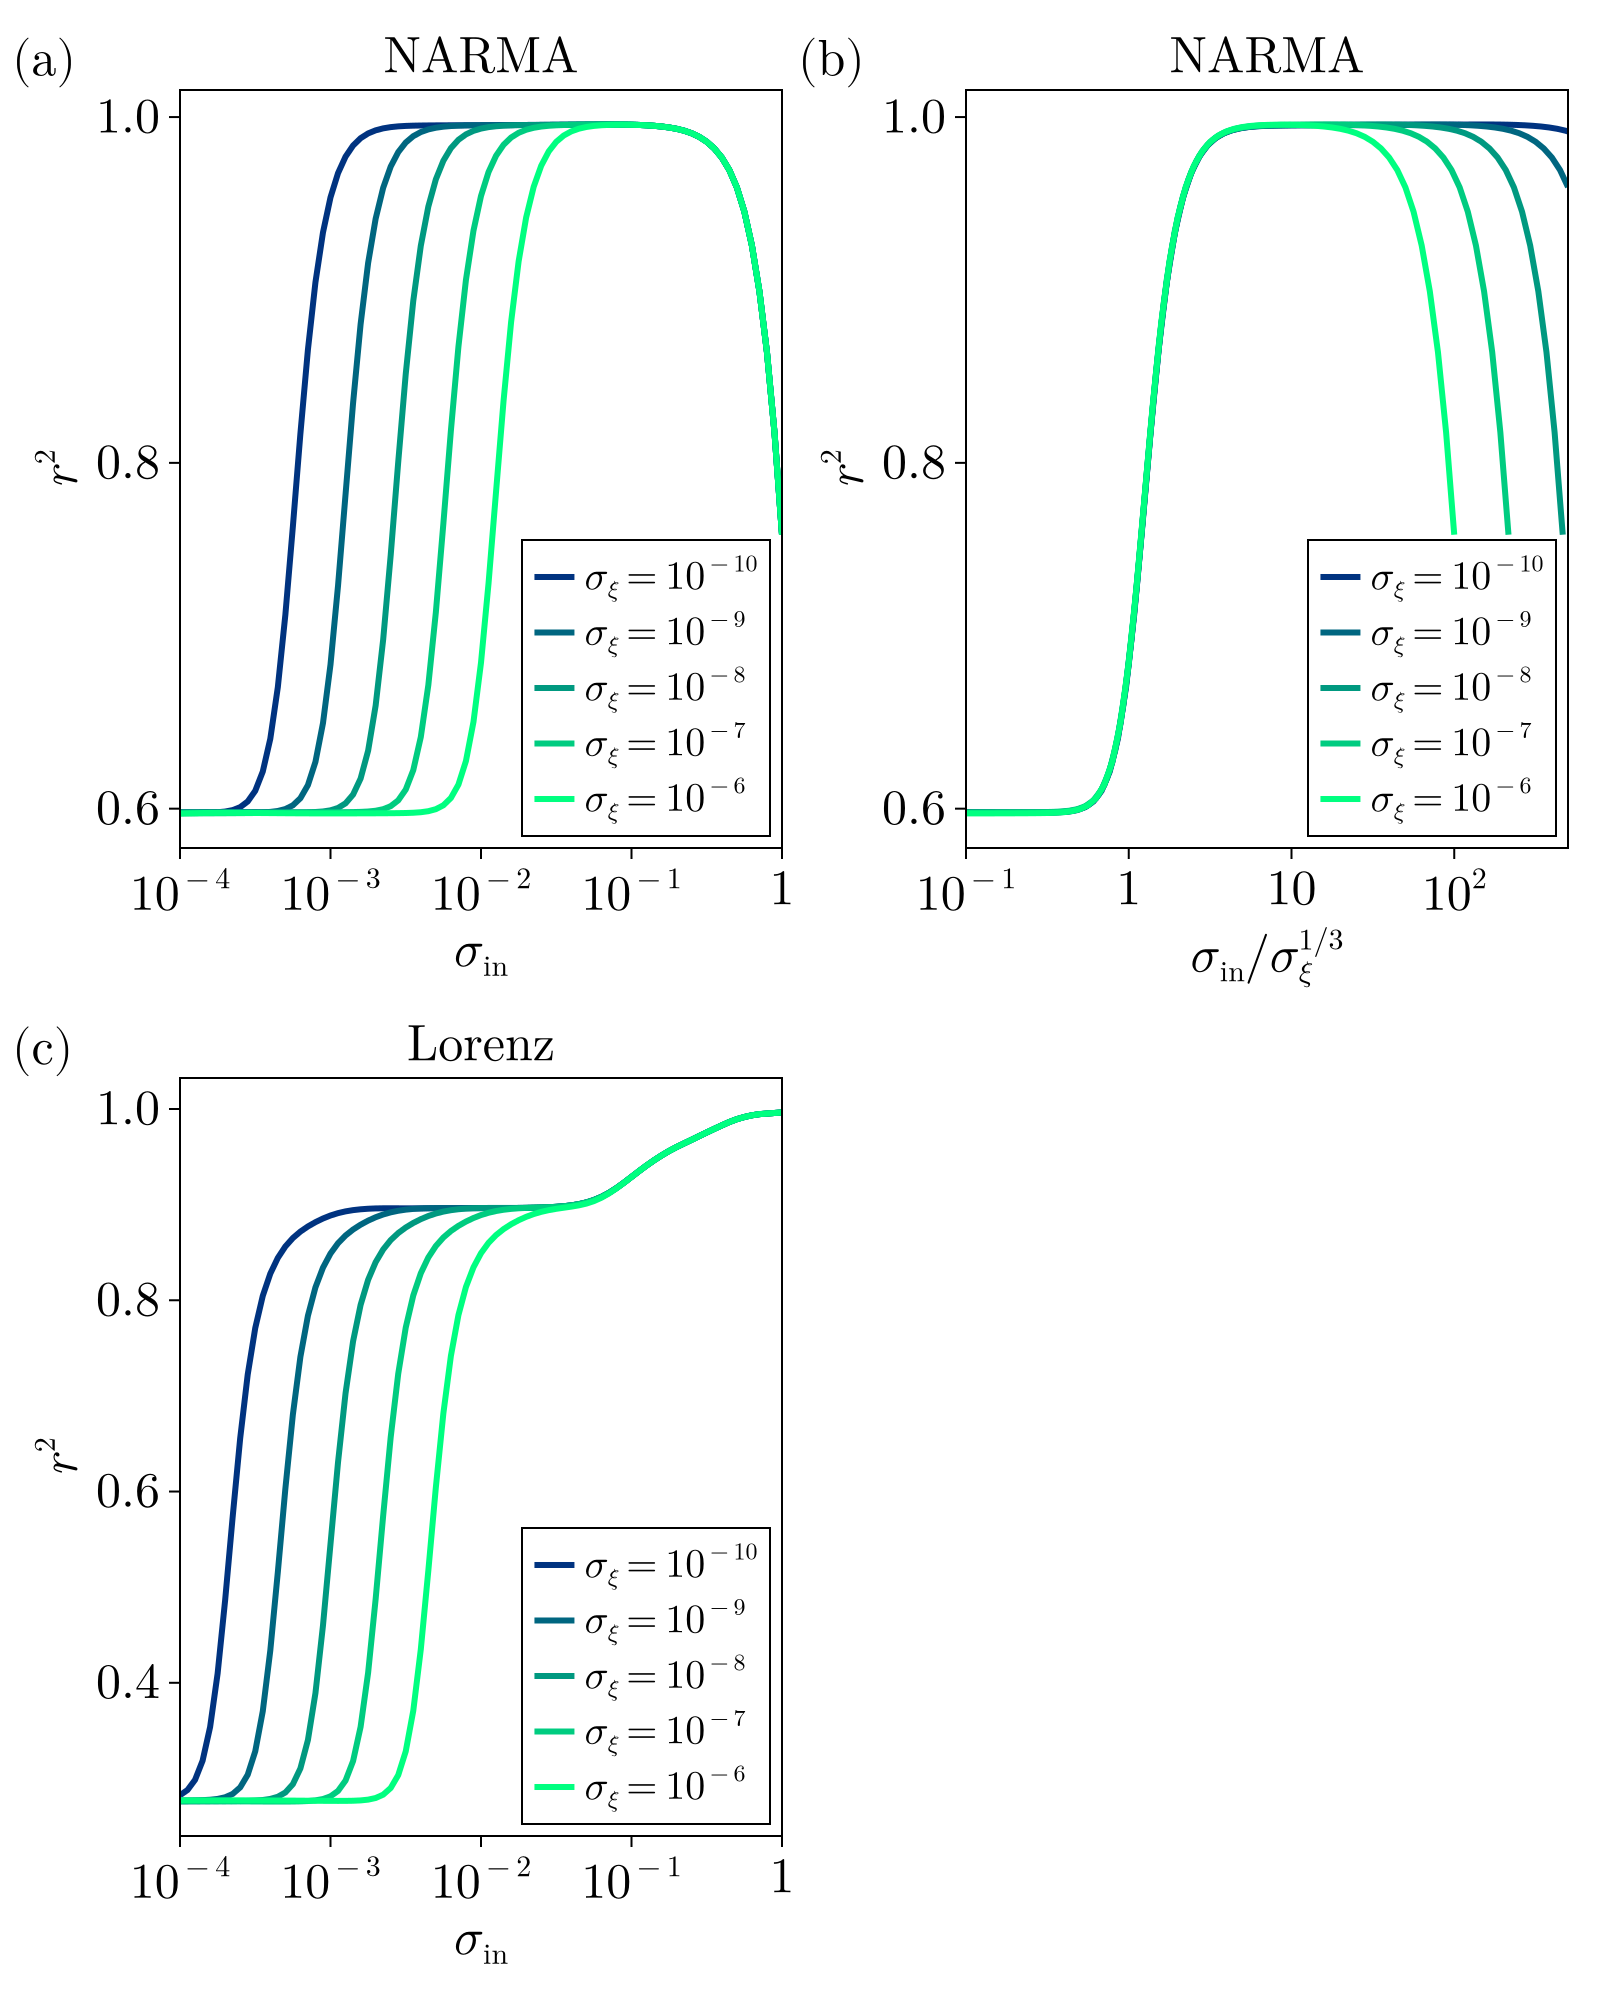

In [9]:
ax = Axis(fig[2, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-4, 1e-3, 1e-2, 1e-1, 1], [L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{Lorenz}")

xlims!(ax, 1e-4, 1)

lines!(ax, input_std_grid, r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid, r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid, r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid, r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid, r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[2, 1, TopLeft()], L"\mathrm{(c)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

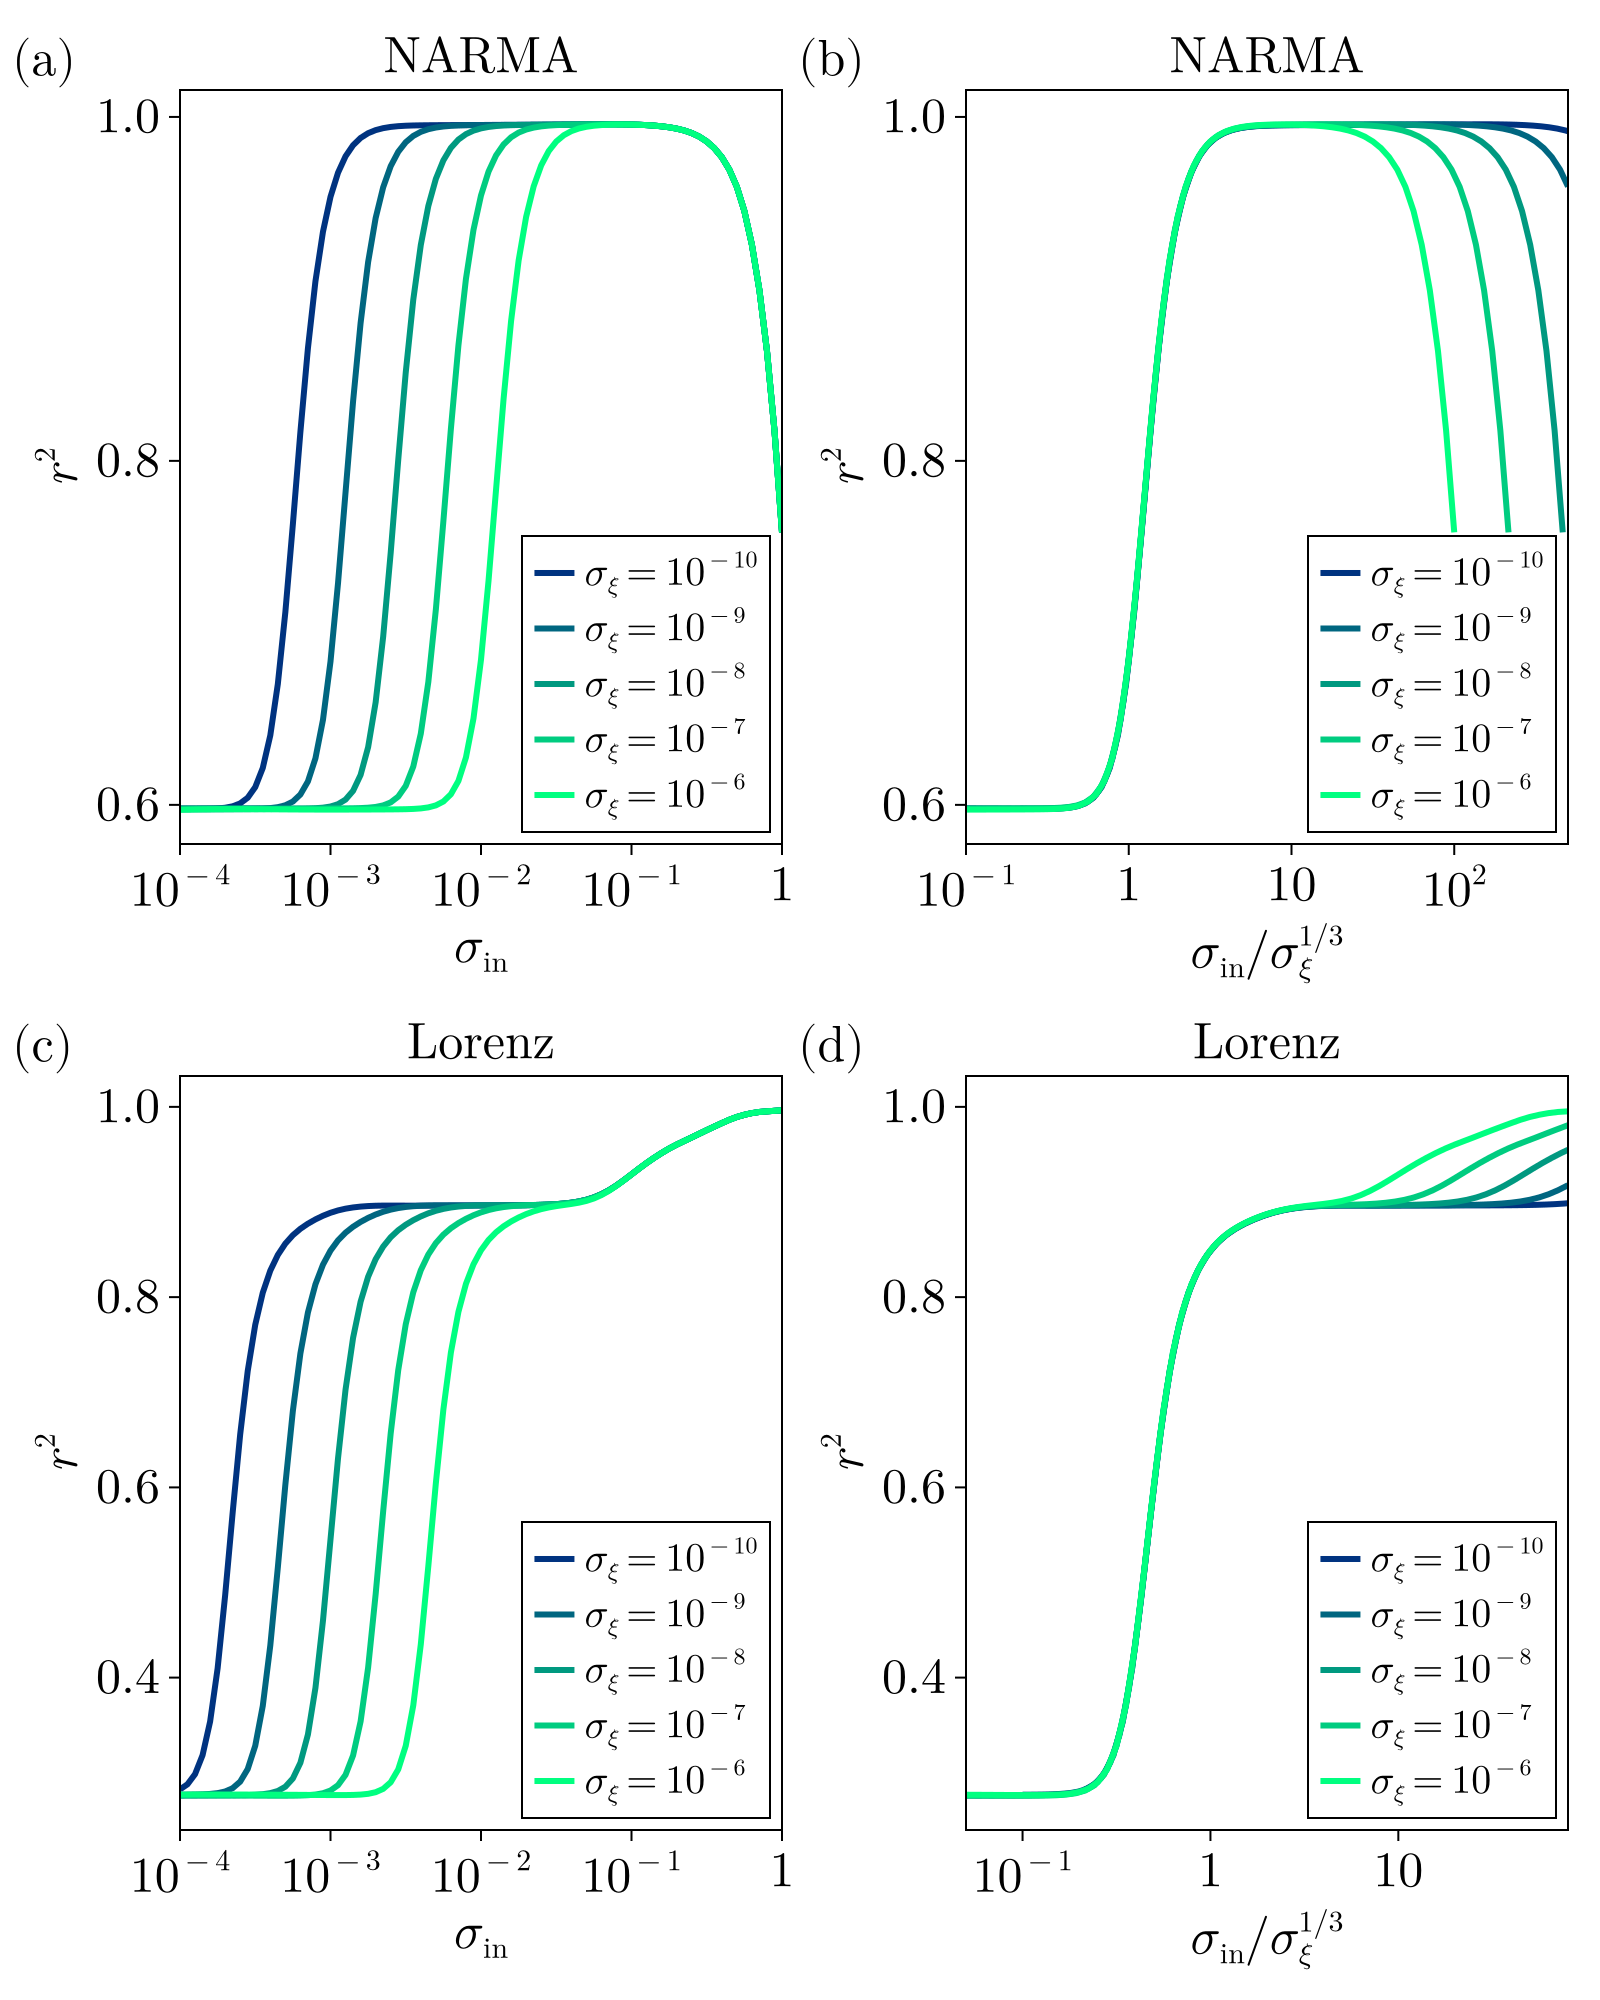

In [10]:
ax = Axis(fig[2, 2];
    xlabel=L"\sigma_{\mathrm{in}} / \sigma_{\xi}^{1/3}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-1, 1, 1e1, 1e2], [L"10^{-1}", L"1", L"10", L"10^2"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{Lorenz}")

xlims!(ax, 5e-2, 80)

lines!(ax, input_std_grid * (1e-10 ^ (-1/3)), r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid * (1e-9 ^ (-1/3)), r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid * (1e-8 ^ (-1/3)), r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid * (1e-7 ^ (-1/3)), r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid * (1e-6 ^ (-1/3)), r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[2, 2, TopLeft()], L"\mathrm{(d)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

In [11]:
# --- Load and average data (delay) ---

input_std_grid = read_from_file("data//delay_r2_noise_scaling//1_input_std_grid.txt")[:, 1]

noise_std_list = ["1e-10", "1e-9", "1e-8", "1e-7", "1e-6"]
r2_av_list = []

for noise_std in noise_std_list
    filename = "data//delay_r2_noise_scaling//r2_N=600_noise=$(noise_std)"
    r2_av = load_average(filename, 20)[:, 1]
    push!(r2_av_list, r2_av)
end
r2_av_list[1]

81-element Vector{Float64}:
 0.9999999393351529
 0.9999999348944917
 0.9999999271723252
 0.9999999151755029
 0.9999998972240547
 0.9999998705801563
 0.9999998308392148
 0.9999997708583859
 0.9999996791706008
 0.9999995379106661
 ⋮
 0.0006209727653854081
 0.0007678915131377408
 0.0010139042849997748
 0.0008036593792845815
 0.0005577593493404984
 0.0008154666050181816
 0.0007824880941635232
 0.0005499816415131033
 0.0006169219057996061

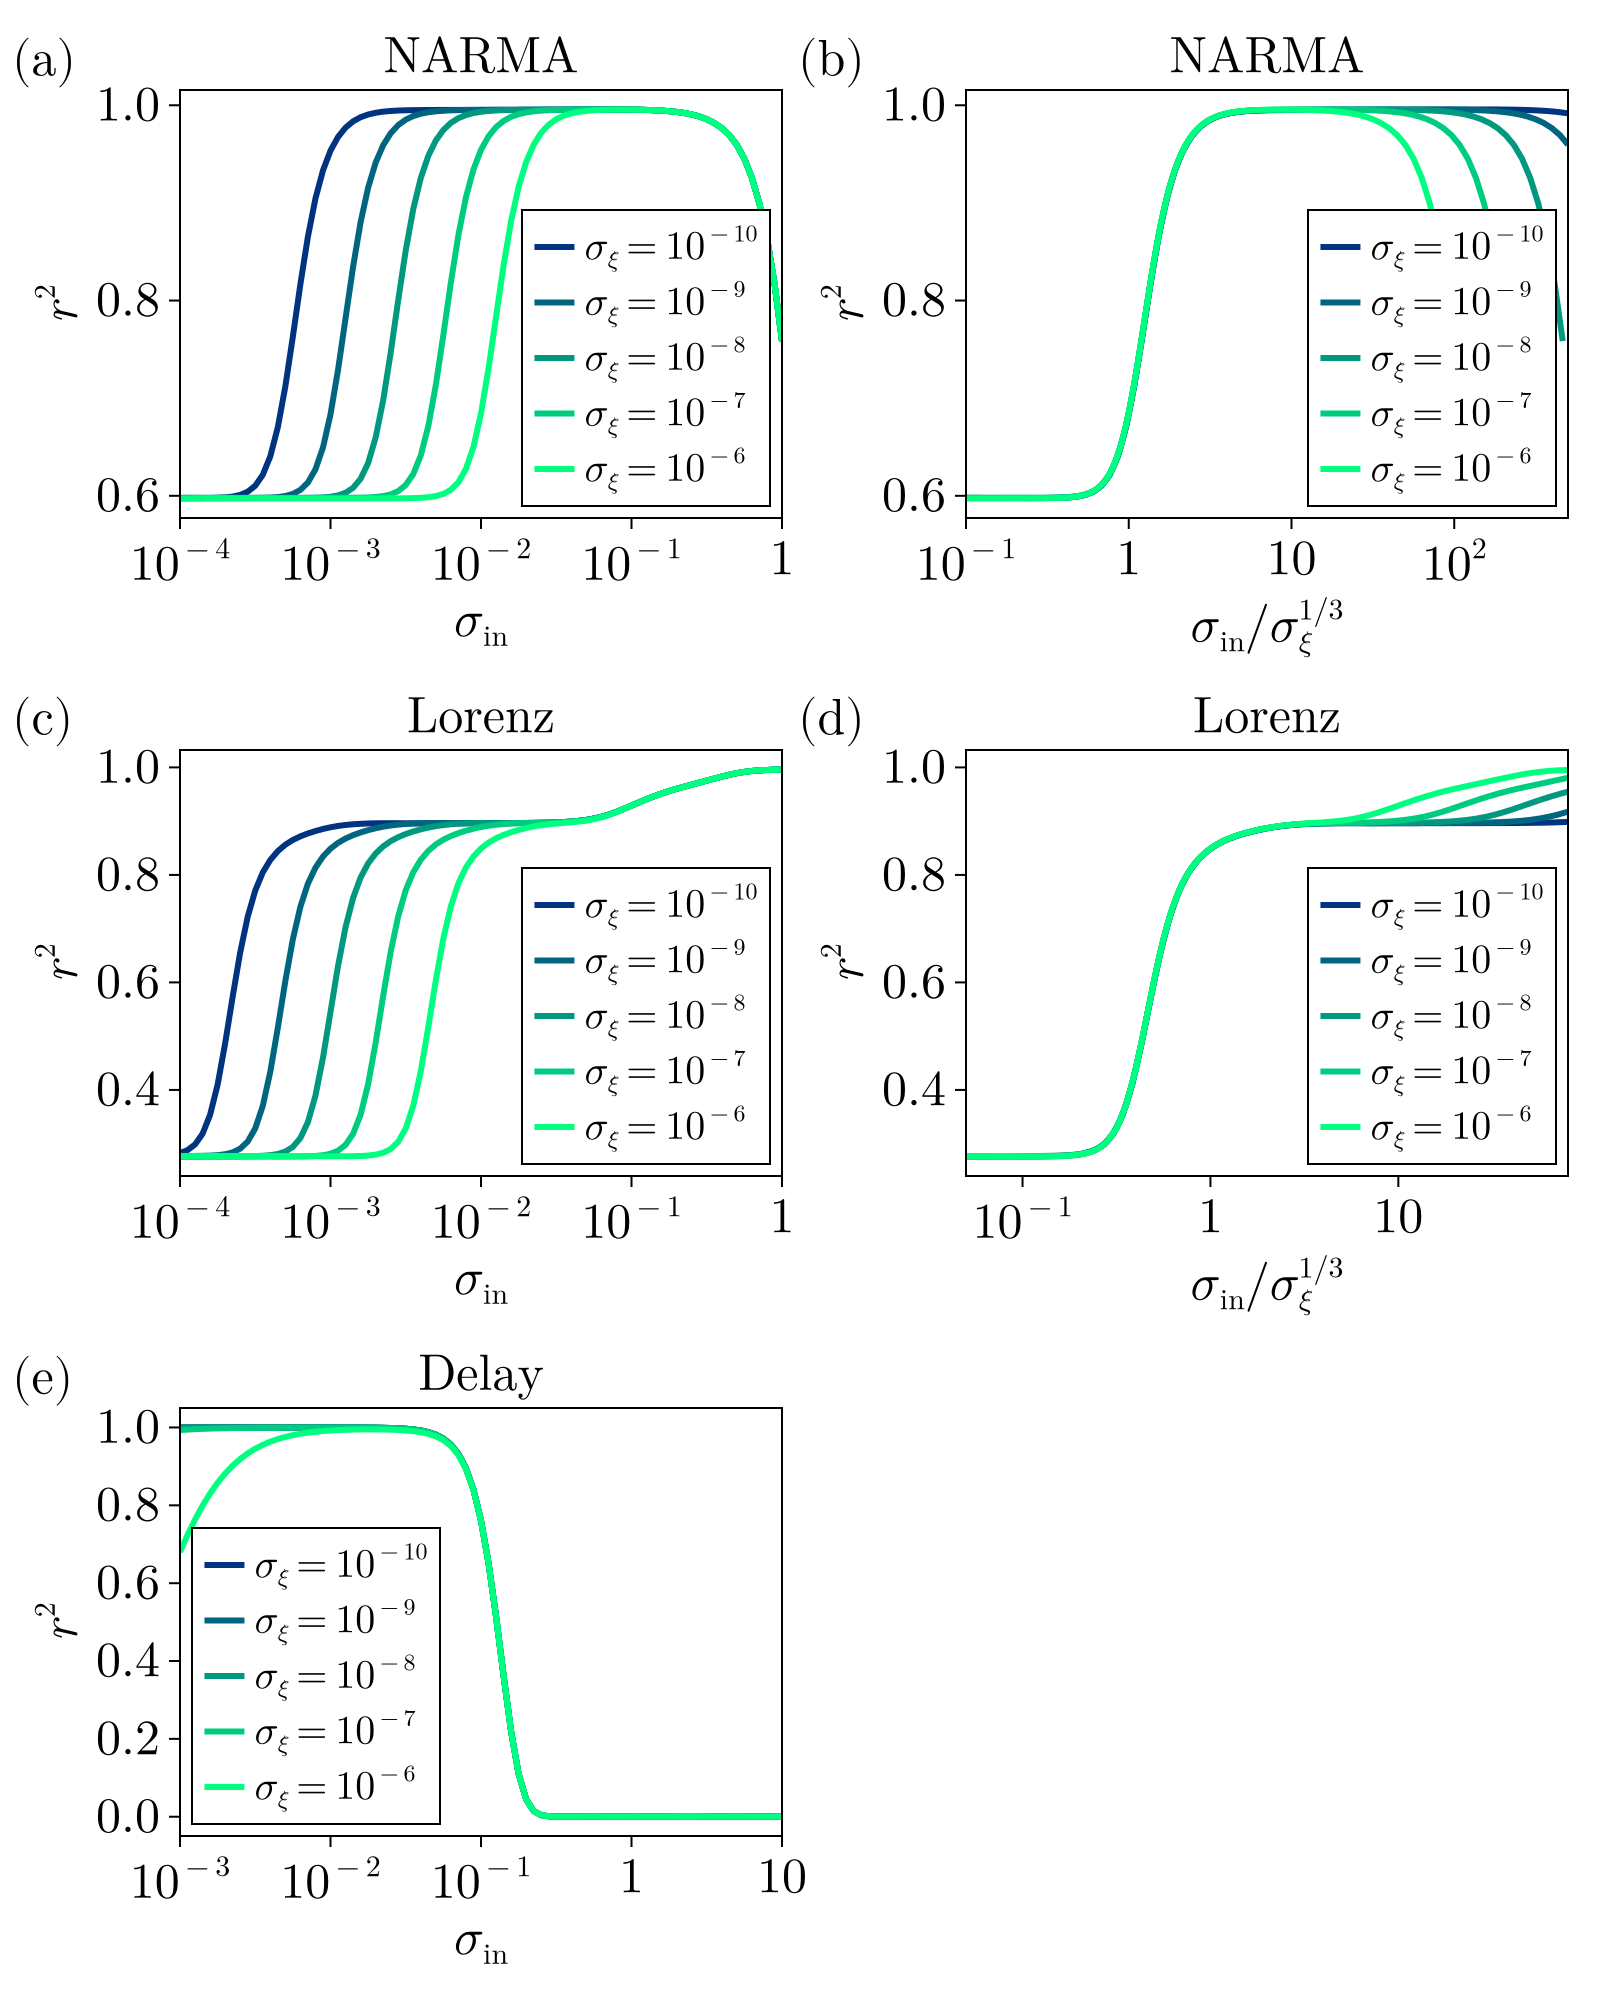

In [12]:
ax = Axis(fig[3, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-3, 1e-2, 1e-1, 1, 10], [L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1", L"10"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{Delay}")

xlims!(ax, 1e-3, 10)

lines!(ax, input_std_grid, r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid, r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid, r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid, r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid, r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:lb)

Label(fig[3, 1, TopLeft()], L"\mathrm{(e)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

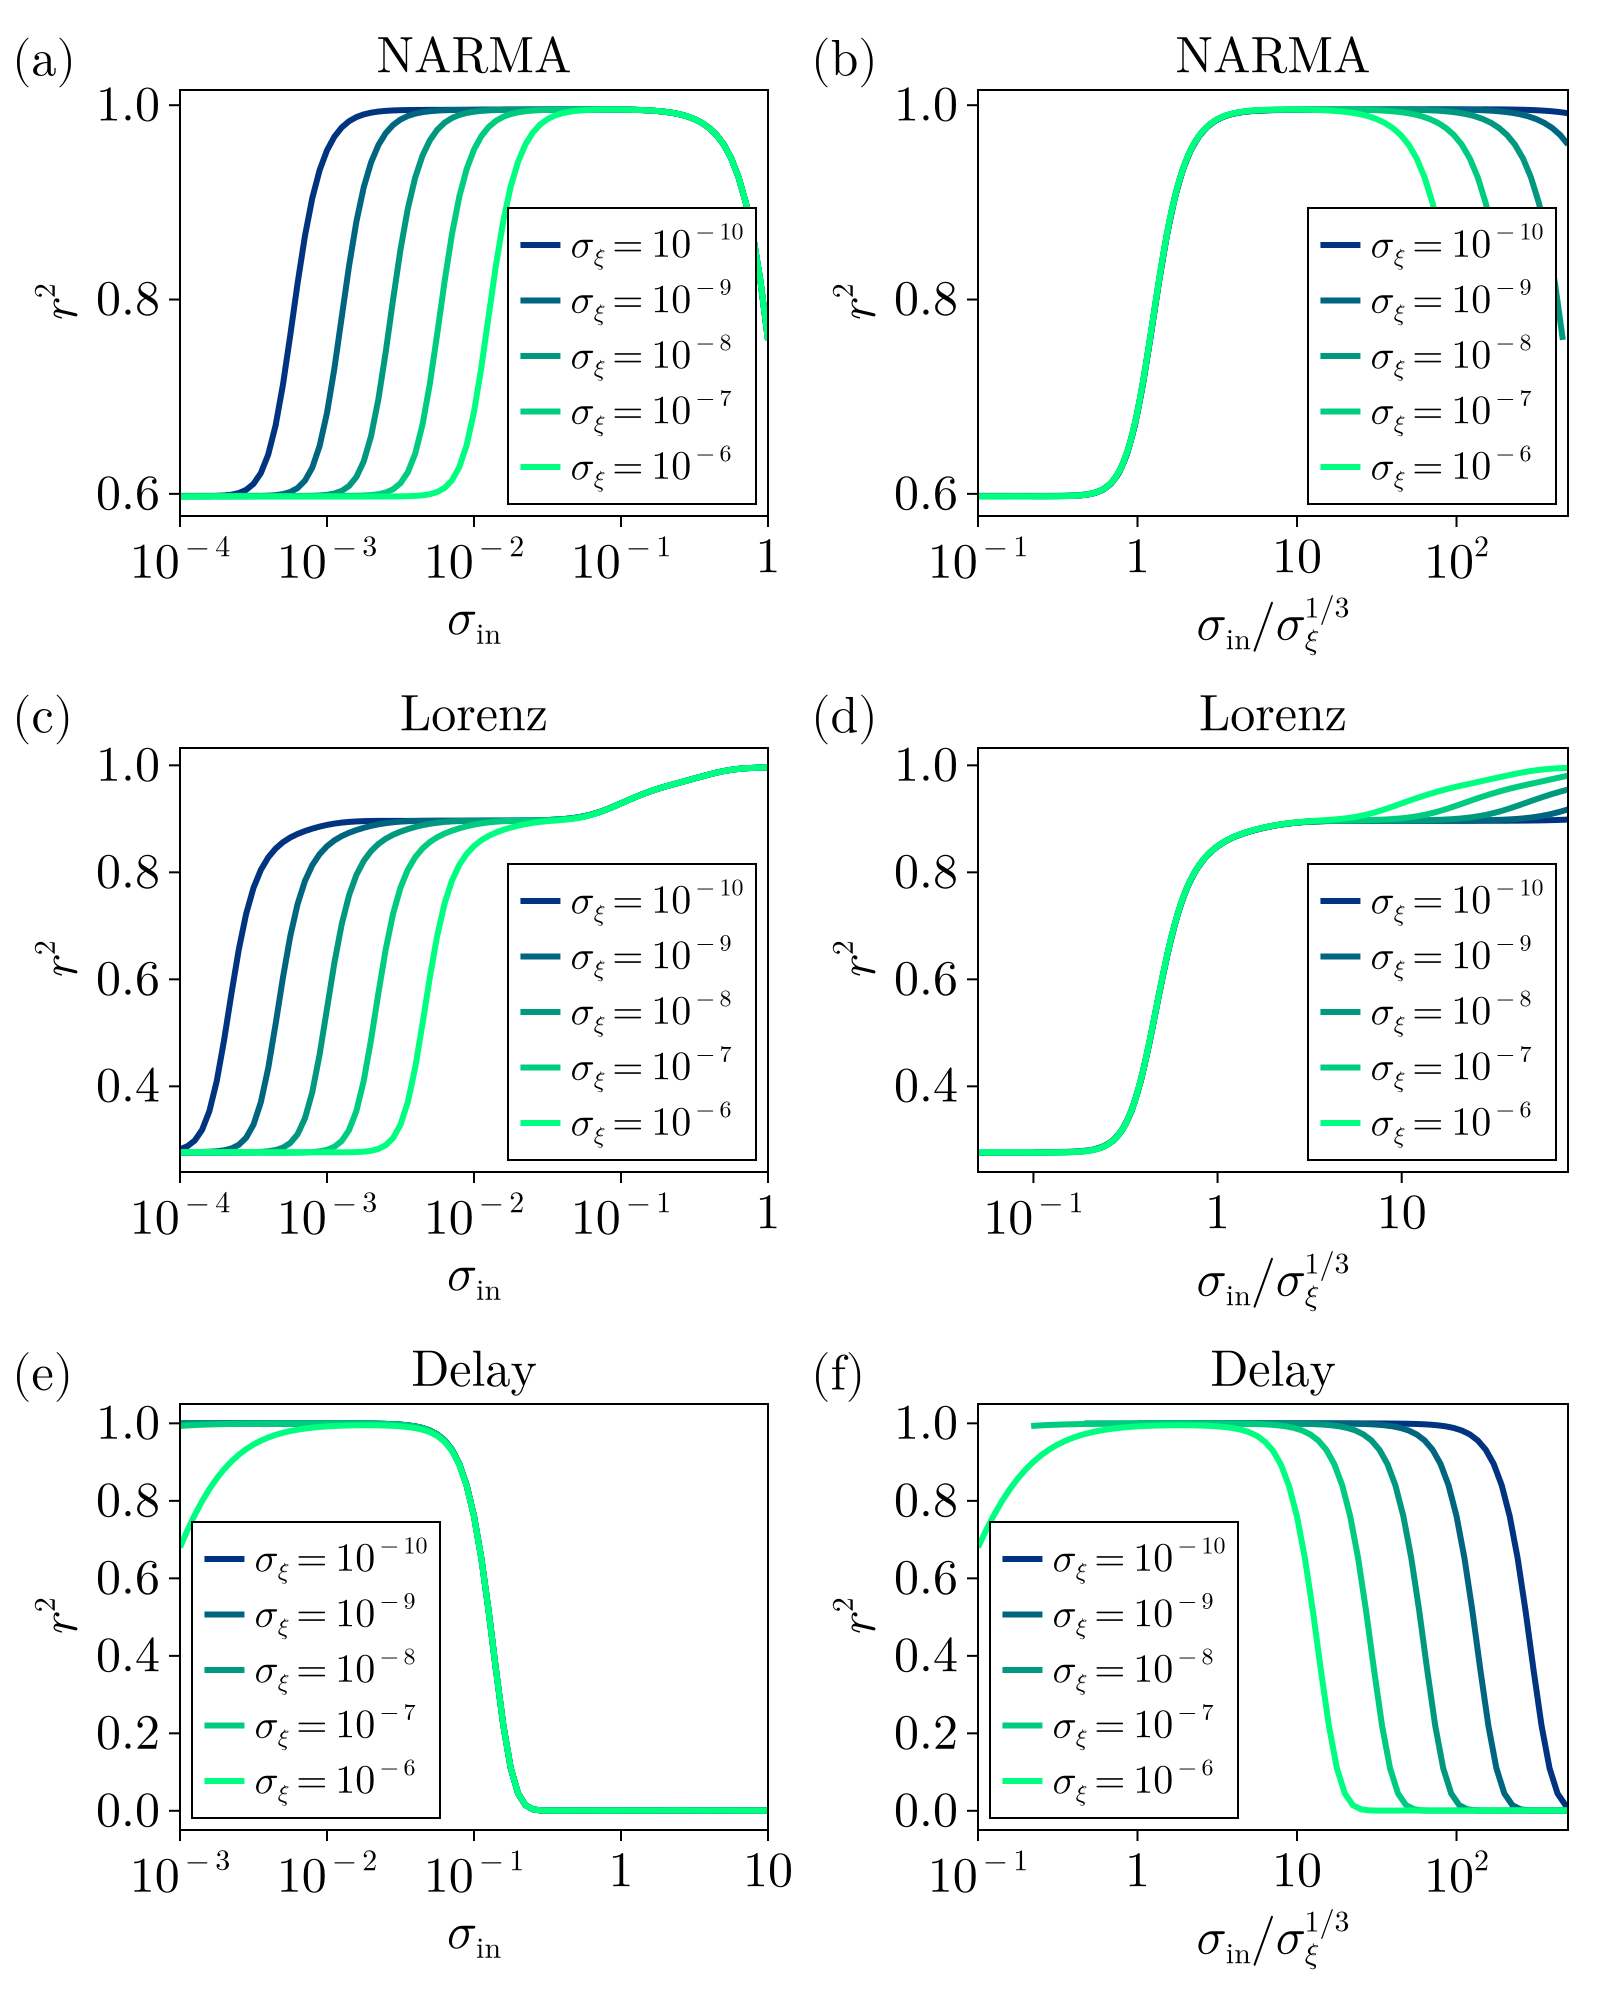

In [13]:
ax = Axis(fig[3, 2];
    xlabel=L"\sigma_{\mathrm{in}} / \sigma_{\xi}^{1/3}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-1, 1, 1e1, 1e2], [L"10^{-1}", L"1", L"10", L"10^2"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{Delay}")

xlims!(ax, 1e-1, 5e2)

lines!(ax, input_std_grid * (1e-10 ^ (-1/3)), r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid * (1e-9 ^ (-1/3)), r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid * (1e-8 ^ (-1/3)), r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid * (1e-7 ^ (-1/3)), r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid * (1e-6 ^ (-1/3)), r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:lb)

Label(fig[3, 2, TopLeft()], L"\mathrm{(f)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

colgap!(fig.layout, 1, Relative(0.05))

fig

In [14]:
save("fig7_narma_delay_noise_scaling.pdf", fig)

CairoMakie.Screen{PDF}
